In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Train.csv")

print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (10999, 12)


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


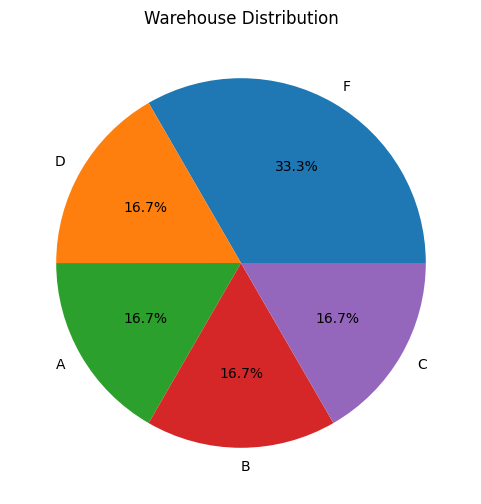

In [5]:
plt.figure(figsize=(6,6))
plt.pie(df['Warehouse_block'].value_counts(),
        labels=df['Warehouse_block'].value_counts().index,
        autopct='%1.1f%%')
plt.title("Warehouse Distribution")
plt.show()

In [6]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [10]:
slice_warehouse_A=df[df['Warehouse_block']=='A']
slice_warehouse_A.head()


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
8,9,A,Flight,3,4,150,3,low,F,11,1861,1
14,15,A,Flight,4,3,152,3,low,M,43,1009,1
20,21,A,Ship,3,3,161,2,medium,F,38,1521,1
26,27,A,Ship,4,1,172,3,high,F,24,1066,1


In [11]:
dice_data = df[(df['Warehouse_block']=='A') &
               (df['Mode_of_Shipment']=='Flight') &
               (df['Product_importance']=='high')]

dice_data.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
140,141,A,Flight,4,4,264,3,high,M,59,2020,1
824,825,A,Flight,3,1,142,2,high,M,18,1428,1
830,831,A,Flight,4,4,201,3,high,F,7,2644,1
956,957,A,Flight,4,1,208,7,high,F,65,2674,1
1112,1113,A,Flight,5,1,222,3,high,M,21,2351,1


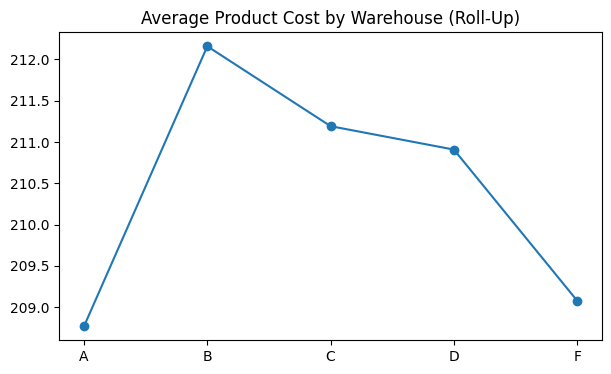

In [12]:
warehouse_cost = df.groupby('Warehouse_block')['Cost_of_the_Product'].mean()
plt.figure(figsize=(7,4))
plt.plot(warehouse_cost.index, warehouse_cost.values, marker='o')
plt.title("Average Product Cost by Warehouse (Roll-Up)")
plt.show()

In [13]:
dice_data = df[(df['Warehouse_block']=='A') &
               (df['Mode_of_Shipment']=='Flight') &
               (df['Product_importance']=='high')]

dice_data.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
140,141,A,Flight,4,4,264,3,high,M,59,2020,1
824,825,A,Flight,3,1,142,2,high,M,18,1428,1
830,831,A,Flight,4,4,201,3,high,F,7,2644,1
956,957,A,Flight,4,1,208,7,high,F,65,2674,1
1112,1113,A,Flight,5,1,222,3,high,M,21,2351,1
